# 02. Exploratory Data Analysis (EDA), KPIs & Statistical Testing

---

## Introduction

The objective of this notebook is to perform a deep exploratory data analysis (EDA) on the cleaned and enriched dataset. We will investigate key business questions, calculate performance indicators (KPIs), create visualizations to uncover insights, and apply statistical tests to validate our findings.

**Key Areas of Analysis:**

1.  **Customer Satisfaction & Sales Performance:**
    * What is the overall distribution of customer review scores?
    * What is the geographic distribution of orders across Brazil?
    * Are there significant seasonal patterns in sales?

2.  **Logistics Performance and its Impact:**
    * What is the relationship between shipping time, delays, and customer satisfaction?
    * How strong is the statistical correlation between delivery performance and review scores?
    * Are the observed differences in delivery times across review scores statistically significant?

3.  **Product-Level Insights:**
    * What are the best-selling product categories?
    * Is there a relationship between product category, price, and customer ratings?

4.  **Payment Methods:**
    * What are the most common payment methods?
    * Is there a relationship between payment method (e.g., installments) and total order value?

In [17]:
# --- 2. Setup and Imports ---

# Importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Adding the project's root directory to the Python path
import sys
sys.path.append('..')

# Importing our custom functions
from src.data_utils import load_processed
from src.viz import plot_bar, plot_heatmap,plot_count, plot_line, plot_box, plot_stacked_bar, plot_bubble, pie_plot

# Configuring pandas and matplotlib for better display
pd.set_option('display.max_columns', 100)

print("Setup complete.")

Setup complete.


In [18]:
# --- 3. Loading Analytics-Ready Data ---

# Load the final, enriched dataframe from the processed folder
df_analytics = load_processed('analytics_main_data')

# --- Verification ---
print("--- Analytics Data Verification ---")
print(f"DataFrame loaded successfully. Shape: {df_analytics.shape}")
print("\n[INFO - First 5 Columns]")
df_analytics.iloc[:, :5].info() # Display info for the first 5 columns for a quick check
print("\n[HEAD]")
display(df_analytics.head())

Loading processed data from: /home/lucas/olist-data-analysis-project/notebooks/../data/processed/analytics_main_data.parquet
--- Analytics Data Verification ---
DataFrame loaded successfully. Shape: (118310, 44)

[INFO - First 5 Columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  118310 non-null  object        
 1   customer_id               118310 non-null  object        
 2   order_status              118310 non-null  object        
 3   order_purchase_timestamp  118310 non-null  datetime64[ns]
 4   order_approved_at         118295 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 4.5+ MB

[HEAD]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_value,shipping_time_days,total_delivery_time,shipping_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,118.70,13,13,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,159.90,9,9,0


---
## 1. Analysis of Customer Satisfaction

### 1.1. What is the distribution of review scores?

To understand overall customer satisfaction, we will start by analyzing the distribution of the `review_score` column. This will give us a high-level view of whether customers are generally happy, unhappy, or polarized.

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=colors, stat='percent')
/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:191: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=data, x=column, palette=colors, stat='percent')


Count plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/review_score_distribution.png


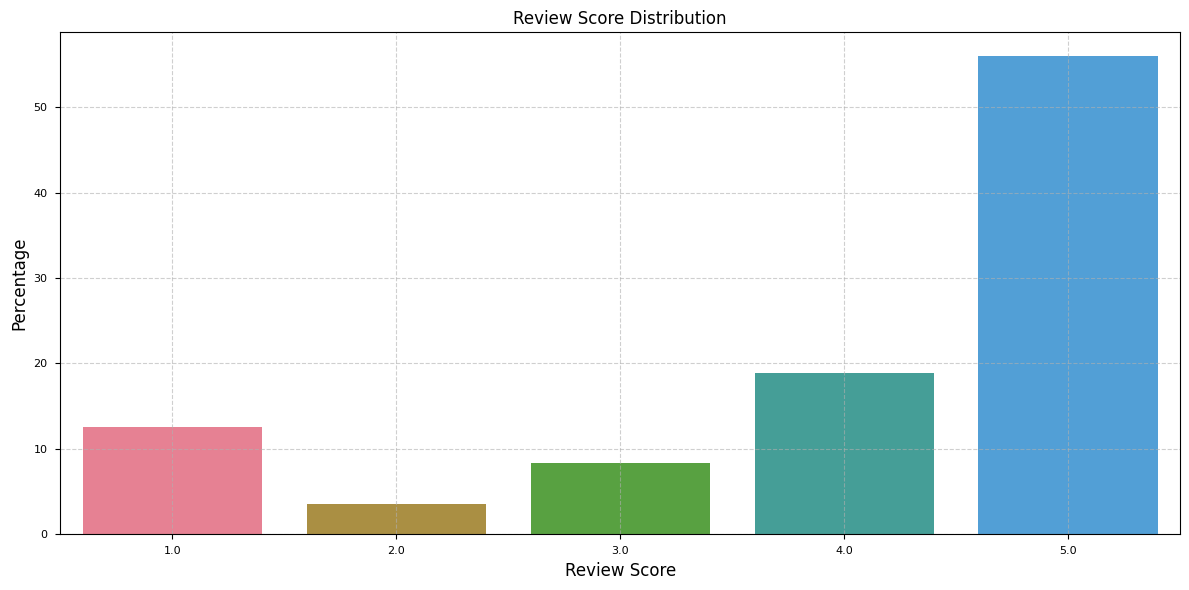

In [19]:
plot_count(df_analytics, column='review_score', title='Review Score Distribution', xlabel='Review Score', save_path='review_score_distribution.png')

In [20]:
for x in range(2,6):

    filt = df_analytics['review_score'] >= x
    df_analytics_filtered = df_analytics[filt]
    df_analytics_filtered['review_score'].count()
    df_analytics['review_score'].count()
    print(f'{df_analytics_filtered['review_score'].count() / df_analytics['review_score'].count() * 100: .2f}')

 87.34
 83.86
 75.47
 56.48


### Insight: Customer Experience is Polarized

The analysis of review scores reveals a J-shaped distribution, indicating a polarized customer experience.

* **Overwhelmingly Positive:** The vast majority of customers are satisfied. As calculated, over 75% of all reviews are positive (scores 4 and 5).
* **Peak Satisfaction:** A significant majority, approximately 57% of customers, give the highest possible score (5), indicating a successful experience.
* **A Significant Point of Failure:** Despite the positive trend, there is a substantial cluster of very dissatisfied customers. Around 13% of all reviews are the lowest possible score (1).

This suggests that while the platform generally delivers a high-quality experience, there is a recurring type of problem that leads to significant customer frustration. Future analysis should focus on identifying the drivers of these 1-star reviews.

### 1.2. Geographic Distribution of Orders

Next, let's investigate where the orders are coming from. Understanding the geographic distribution is crucial for logistics planning, marketing campaigns, and identifying key markets. We will start by visualizing the number of orders per state.

In [21]:
geo_distribution = df_analytics.groupby('customer_state')
geo_distribution = geo_distribution['order_id'].nunique()
geo_distribution = geo_distribution.sort_values(ascending=False).head(15)
geo_distribution


customer_state
SP    41375
RJ    12762
MG    11544
RS     5432
PR     4998
SC     3612
BA     3358
DF     2125
ES     2025
GO     2007
PE     1648
CE     1327
PA      970
MT      903
MA      740
Name: order_id, dtype: int64

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/geo_distribution_orders.png


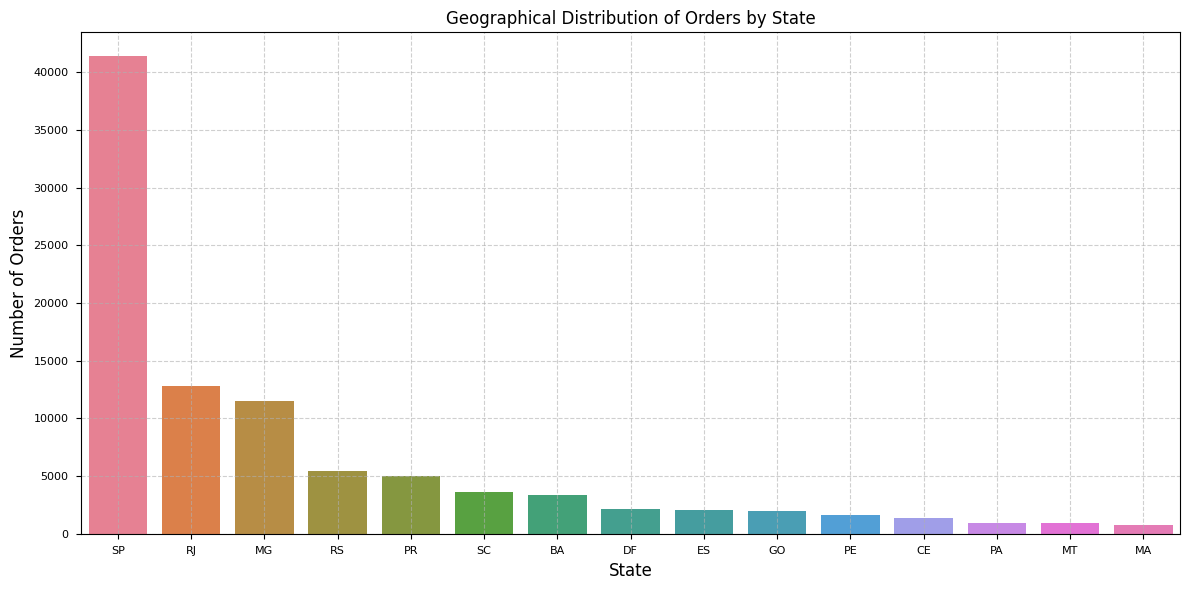

In [22]:
plot_bar(x=geo_distribution.index, y=geo_distribution.values, title='Geographical Distribution of Orders by State', xlabel='State', ylabel='Number of Orders', save_path='geo_distribution_orders.png')

In [23]:
# We can evaluate the percentage distribution of orders by state
print((geo_distribution.values/geo_distribution.values.sum())*100)

[43.63254804 13.45833421 12.17387636  5.72838673  5.27070635  3.8090819
  3.54122287  2.24094658  2.13549027  2.11650813  1.73791998  1.39940523
  1.0229262   0.95227047  0.78037669]


### Insight: Sales are Heavily Concentrated in the Southeast Region

The geographical analysis reveals a significant concentration of orders in a few key states, highlighting the importance of the Southeast region to the business.

* **Dominance of São Paulo (SP):** The state of São Paulo is the undisputed primary market, accounting for over 43% of all orders among the top 15 states. This single state generates more than three times the order volume of the next largest state.
* **Southeastern Powerhouse:** The Southeast region (SP, RJ, MG) is the core of the business, representing approximately 70% of the total order volume.
* **Secondary Markets:** The Southern region (RS, PR, SC) emerges as the second most important market, followed by key states in the Northeast and Central-West.
* **Business Implication:** This heavy concentration suggests that while logistical operations in the Southeast are likely mature, there is a significant opportunity for growth in other regions. Further analysis should investigate if factors like shipping costs or delivery times are barriers to entry in less represented states.

### 1.3. Sales Seasonality Analysis

Understanding temporal patterns is key for inventory management and marketing strategies. In this section, we'll analyze the number of orders over time to identify any seasonal trends or significant periods of sales growth. We will begin by plotting the number of orders per month.

In [24]:
df_analytics['Orders by Month'] = df_analytics['order_purchase_timestamp'].dt.to_period('M')
df_month = df_analytics.groupby('Orders by Month')
df_month = df_month['order_id'].nunique()
df_month = df_month.sort_index(ascending=True)
df_month

Orders by Month
2016-09       3
2016-10     308
2016-12       1
2017-01     789
2017-02    1733
2017-03    2641
2017-04    2391
2017-05    3660
2017-06    3217
2017-07    3969
2017-08    4293
2017-09    4243
2017-10    4568
2017-11    7451
2017-12    5624
2018-01    7220
2018-02    6694
2018-03    7188
2018-04    6934
2018-05    6853
2018-06    6160
2018-07    6273
2018-08    6452
2018-09       1
Freq: M, Name: order_id, dtype: int64

Line plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/orders_by_month.png


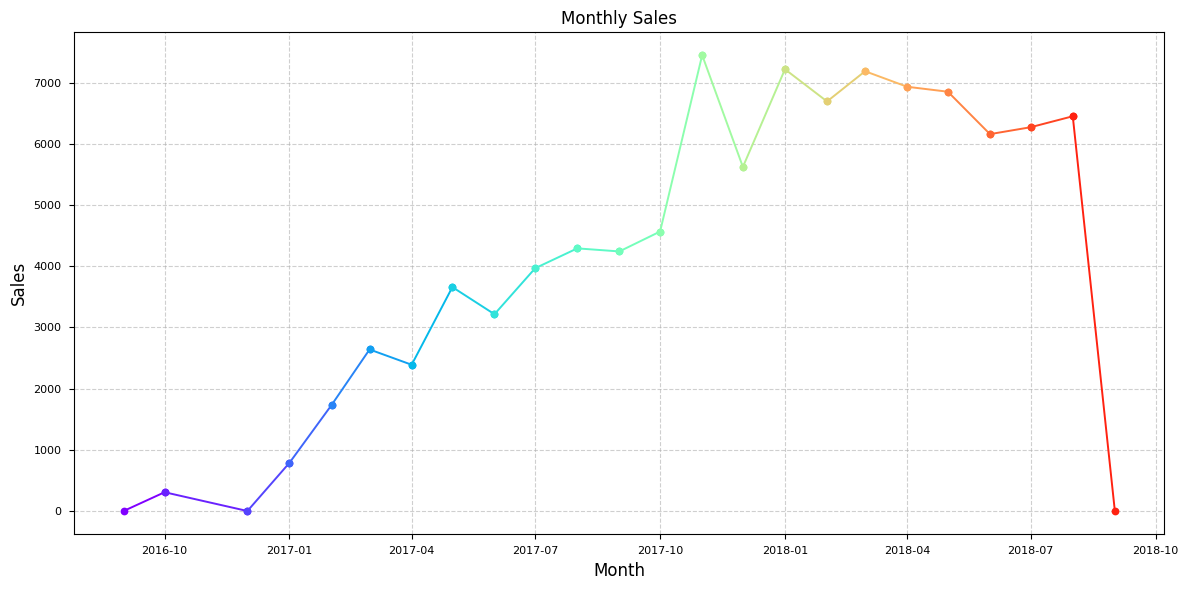

In [25]:
plot_line(data=df_month, title='Monthly Sales', xlabel='Month', ylabel='Sales', save_path='orders_by_month.png')

### Insight: Strong Sales Growth and Clear End-of-Year Seasonality

The analysis of orders over time reveals two major trends: overall business growth and a distinct seasonal pattern.

* **Business Growth:** There is a clear positive trend in order volume from the beginning of 2017 through mid-2018, indicating a period of significant business expansion. The number of orders in July 2018, for instance, is substantially higher than in July 2017.
* **Q4 Peak Seasonality:** A consistent and strong seasonal peak occurs in the fourth quarter (Q4), particularly in November. This spike is directly attributable to major retail events like Black Friday and the Christmas holiday season, which are the most critical sales periods for the business.
* **Data Anomalies:** The data points for late 2016 and late 2018 are significantly lower than the surrounding months. This is likely due to an incomplete data capture for those periods and should not be interpreted as a business trend.

**Business Implication:** The company's sales are heavily dependent on the Q4 peak. Marketing efforts, inventory management, and logistics must be exceptionally well-prepared for this period. The overall growth trend also suggests that the company was successfully scaling its operations during this timeframe.

---
## 2. Logistic Performance Analysis

### 2.1. What is the relationship between shipping time, delays, and customer satisfaction?

One of the most critical hypotheses in e-commerce is that delivery performance directly impacts customer satisfaction. In this section, we will investigate the relationship between the actual shipping time, delivery delays, and the final review scores given by the customers.

In [26]:
df_analytics.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_value,shipping_time_days,total_delivery_time,shipping_delay_days,Orders by Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,118.70,13,13,0,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,159.90,9,9,0,2018-08


In [27]:
dev_performance = df_analytics.groupby('review_score')['shipping_time_days'].mean()
dev_performance2 = df_analytics.groupby('review_score')['shipping_delay_days'].mean()

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/avg_shipping_time_by_review_score.png


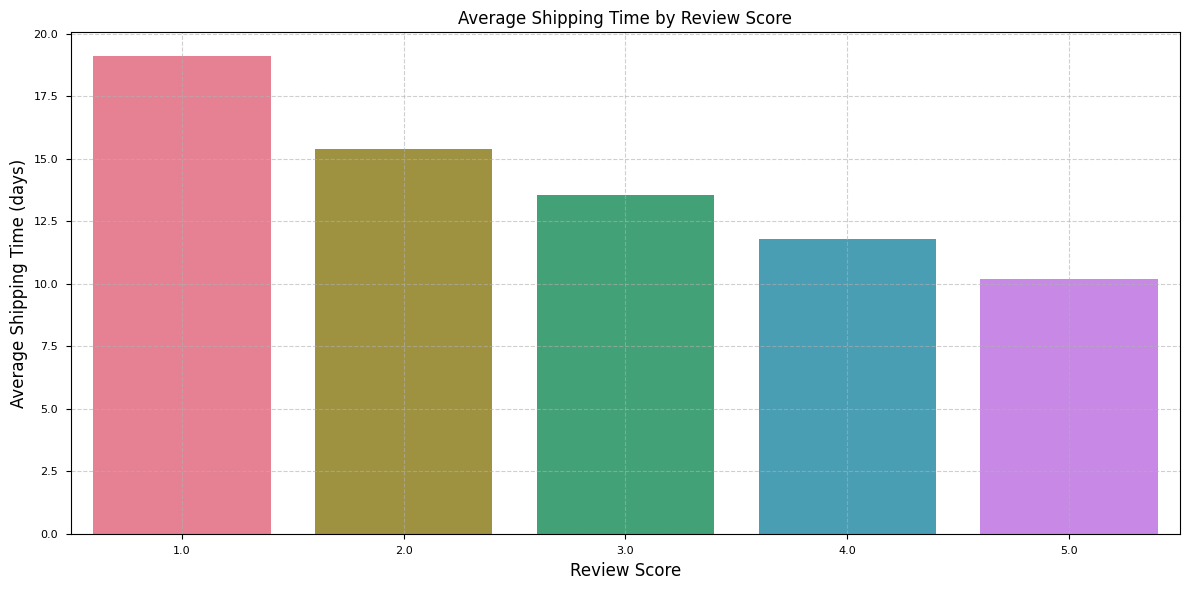

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/avg_shipping_delay_by_review_score.png


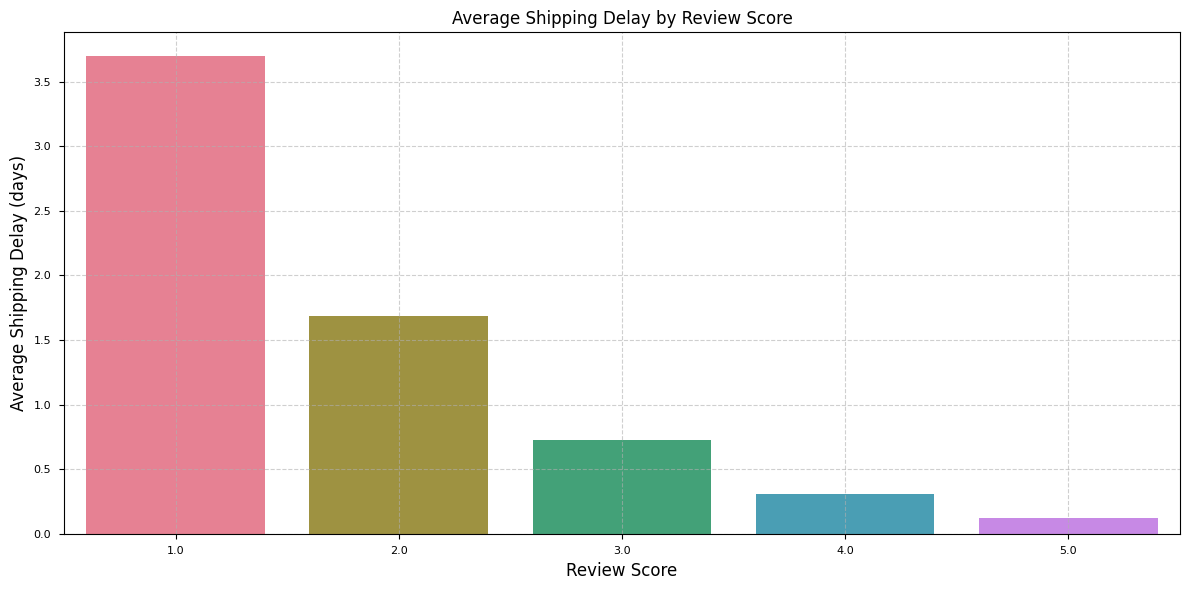

In [28]:
plot_bar(dev_performance.index, dev_performance.values, title='Average Shipping Time by Review Score', xlabel='Review Score', ylabel='Average Shipping Time (days)', save_path='avg_shipping_time_by_review_score.png')
plot_bar(dev_performance2.index, dev_performance2.values, title='Average Shipping Delay by Review Score', xlabel='Review Score', ylabel='Average Shipping Delay (days)', save_path='avg_shipping_delay_by_review_score.png')

In [29]:
plot_dev_performance = df_analytics.dropna(subset=['shipping_time_days', 'shipping_delay_days', 'review_score'])
plot_dev_performance['Delayed'] = plot_dev_performance['shipping_delay_days'].apply(lambda x: "Yes" if x > 0 else "No")


/tmp/ipykernel_106427/3220770647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dev_performance['Delayed'] = plot_dev_performance['shipping_delay_days'].apply(lambda x: "Yes" if x > 0 else "No")


Box plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/box_shipping_time_by_review_score.png


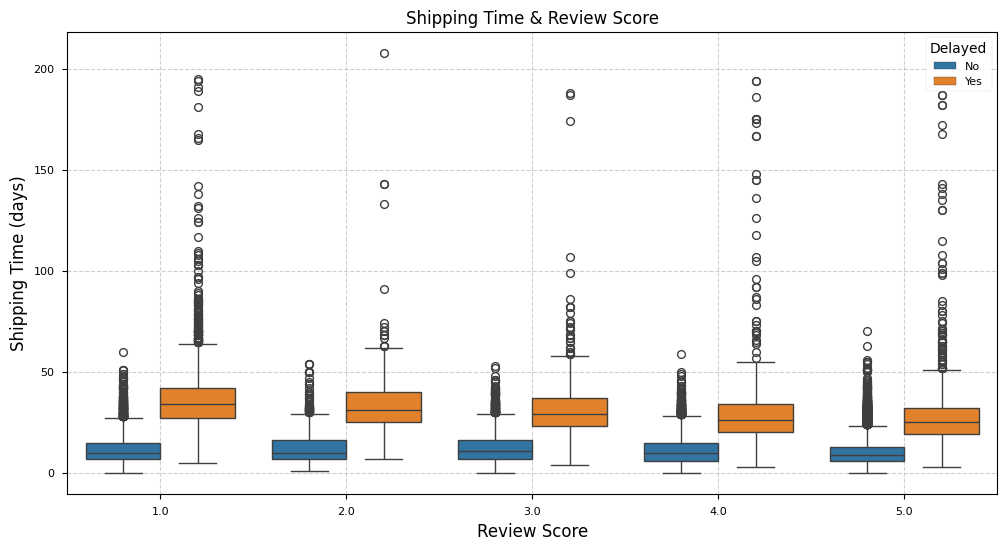

In [30]:
plot_box(df=plot_dev_performance, x='review_score', y='shipping_time_days', title='Shipping Time & Review Score', xlabel='Review Score', ylabel='Shipping Time (days)', save_path='box_shipping_time_by_review_score.png', hue='Delayed')

In [31]:
plot_dev_performance.groupby(['Delayed', 'review_score'])[['shipping_time_days']].describe()

shipping_time_days                                   \
                                  count       mean        std  min   25%   
Delayed review_score                                                       
No      1.0                      9113.0  11.743114   7.034841  0.0   7.0   
        2.0                      3263.0   11.90285   7.374168  1.0   7.0   
        3.0                      8870.0  11.984667   6.988965  0.0   7.0   
        4.0                     21413.0  11.136179   6.405738  0.0   6.0   
        5.0                     64834.0   9.872675   5.919378  0.0   6.0   
Yes     1.0                      4008.0  35.827345  15.360687  5.0  27.0   
        2.0                       636.0  33.231132  15.356602  7.0  25.0   
        3.0                       780.0  31.380769  16.238115  4.0  23.0   
        4.0                       737.0   30.43555  23.937225  3.0  20.0   
        5.0                      1207.0  27.960232  18.991272  3.0  19.0   

                                         
                       50%   75%    max  
Delayed review_score                     
No      1.0           10.0  15.0   60.0  
        2.0           10.0  16.0   54.0  
        3.0           11.0  16.0   53.0  
        4.0           10.0  15.0   59.0  
        5.0            9.0  13.0   70.0  
Yes     1.0           34.0  42.0  195.0  
        2.0           31.0  40.0  208.0  
        3.0           29.0  37.0  188.0  
        4.0           26.0  34.0  194.0  
        5.0           25.0  32.0  187.0

Stacked bar plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/delay_proportion_by_review_score.png


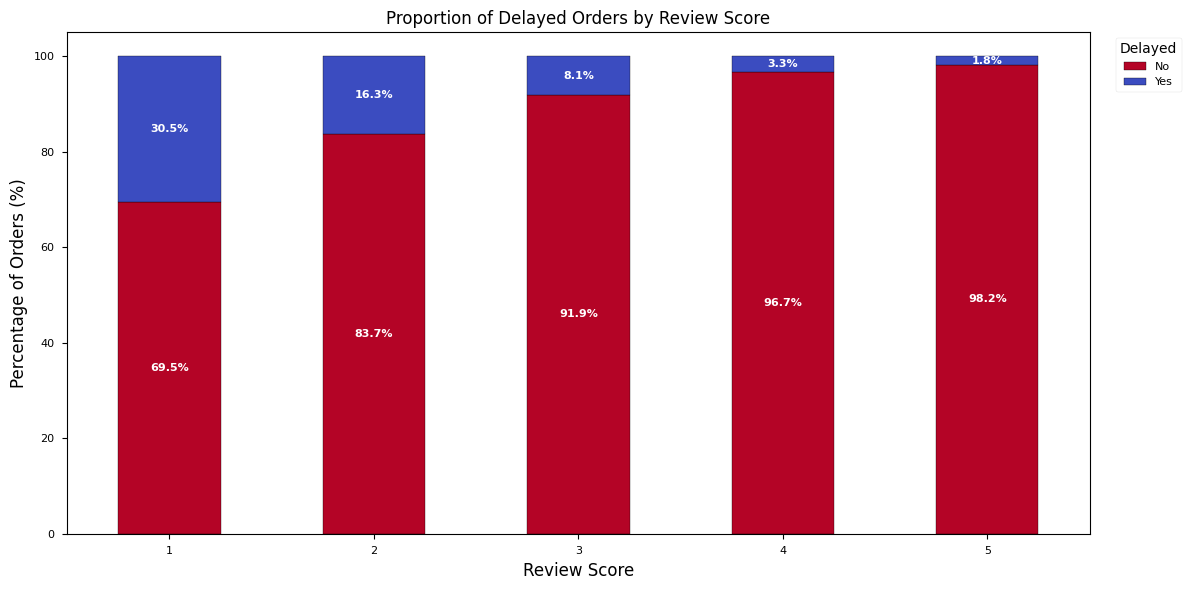

In [32]:
delay_counts = plot_dev_performance.groupby(['review_score', 'Delayed'])['order_id'].count()
delay_percentage = delay_counts.groupby(level=0).apply(lambda x: 100 * x / x.sum())

delay_percentage_df = delay_percentage.unstack(level='Delayed').fillna(0)


plot_stacked_bar(data=delay_percentage_df,title='Proportion of Delayed Orders by Review Score',xlabel='Review Score',ylabel='Percentage of Orders (%)',save_path='delay_proportion_by_review_score.png')

### Insight: Delivery Performance is a Key Driver of Customer Satisfaction

The analysis confirms a strong negative correlation between shipping time/delays and customer review scores. Poor delivery performance is a primary cause of customer dissatisfaction.

* **Longer Shipping Times Lead to Lower Scores:** As shown in the bar chart of averages, there is a clear, inverse relationship: the average shipping time for 1-star reviews is nearly double that of 5-star reviews (approx. 19 days vs. 10 days).
* **Delays are Critical:** The impact is even more pronounced for delayed orders. The `describe()` table and box plot reveal a stark difference: the average shipping time for a 1-star review on a delayed order is **35.8 days**, compared to just **9.8 days** for a 5-star review on an on-time order.
* **The Power of On-Time Delivery:** Even among delayed orders, customers who receive their products faster tend to give better scores. However, the mere fact that an order is delayed significantly increases the likelihood of a low score.

**Business Implication:** Reducing shipping time and, most importantly, meeting the estimated delivery date are the most impactful levers the business can pull to improve its overall customer satisfaction ratings. Investment in logistics, carrier management, and accurate delivery estimates is critical for customer retention.


### 2.2. How strong is the statistical correlation between delivery performance and review scores?

While our visual analyses have provided strong intuitive evidence, applying formal statistical tests validates our findings and quantifies the relationships between variables.

**Spearman Correlation: Delivery Performance vs. Satisfaction**: To formally measure the strength of the relationship between delivery performance and customer satisfaction, we will calculate the Spearman rank correlation coefficient. This non-parametric test is ideal for our data as `review_score` is an ordinal variable and the relationship is not perfectly linear.

In [33]:
spe_data = df_analytics[['review_score', 'shipping_time_days', 'shipping_delay_days']]
spe_data.dropna(inplace=True)
spe_data

/tmp/ipykernel_106427/2269357678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spe_data.dropna(inplace=True)


,review_score,shipping_time_days,shipping_delay_days
0,4.0,8,0
1,4.0,8,0
2,4.0,8,0
3,4.0,13,0
4,5.0,9,0
...,...,...,...
118305,4.0,22,0
118306,5.0,24,0
118307,2.0,17,0
118308,2.0,17,0


In [34]:
spe_data.corr(method='spearman')

,review_score,shipping_time_days,shipping_delay_days
review_score,1.000000,-0.220154,-0.294816
shipping_time_days,-0.220154,1.000000,0.381338
shipping_delay_days,-0.294816,0.381338,1.000000


Heatmap saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/spearman_correlation_heatmap.png


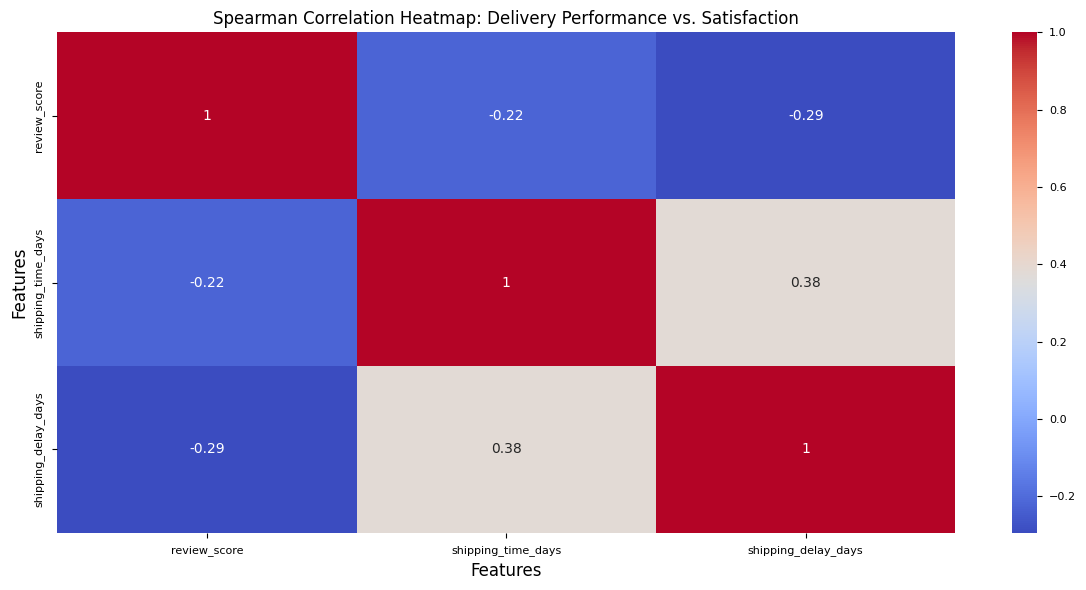

In [35]:
plot_heatmap(spe_data.corr(method='spearman'), title='Spearman Correlation Heatmap: Delivery Performance vs. Satisfaction', xlabel='Features', ylabel='Features', save_path='spearman_correlation_heatmap.png')

### Insight: Delivery Delays are a Stronger Driver of Dissatisfaction than Total Shipping Time

The Spearman correlation analysis mathematically confirms the negative relationship between delivery performance and customer satisfaction.

* **Negative Correlation Confirmed:** Both `shipping_time_days` and `shipping_delay_days` have a statistically significant negative correlation with `review_score`. As they increase, the review score tends to decrease.
* **Broken Promises Hurt More:** The correlation between `review_score` and `shipping_delay_days` (**-0.29**) is noticeably stronger than the correlation with `shipping_time_days` (**-0.22**). This provides a critical business insight: customers are more sensitive to delays (a broken promise) than to the total delivery time itself.
* **Moderate Relationship:** The magnitude of the correlations (around 0.2-0.3) indicates a weak-to-moderate relationship, confirming that while delivery is a major factor, other aspects like product quality and customer service also influence the final score.

**Business Implication:** The top priority for improving customer satisfaction should be to **meet or beat the estimated delivery date**. Investing in more accurate delivery estimates and robust logistics to prevent delays is likely to have a higher ROI on satisfaction than simply reducing the overall shipping time.

### 2.3. Are the observed differences in delivery times across review scores statistically significant?


**Kruskal-Wallis H-Test: Validating the Difference in Shipping Times:** To add further statistical rigor, we will perform a Kruskal-Wallis H-test. This non-parametric test will determine whether the observed differences in the median `shipping_time_days` across the five `review_score` groups are statistically significant or simply due to random chance.

* **Null Hypothesis ($H_0$):** The median shipping time is the same for all review score groups.
* **Alternative Hypothesis ($H_1$):** At least one review score group has a different median shipping time.

In [36]:
from scipy.stats import kruskal

grades = []
df_clean = df_analytics.dropna(subset=['review_score', 'shipping_time_days'])

krus_data = df_clean.groupby('review_score')['shipping_time_days']


for x in range(1, 6):
    if x in krus_data.groups:  
        grade = krus_data.get_group(x).values
        grades.append(grade)

print(kruskal(*grades))


KruskalResult(statistic=np.float64(6091.669624120503), pvalue=np.float64(0.0))


### Insight: Differences in Shipping Time Across Review Scores are Statistically Significant

The Kruskal-Wallis H-test was performed to determine if there is a statistically significant difference in the median shipping times for orders across the five different review score groups.

* **Test Result:** The test yielded an extremely high H-statistic of approximately 6091.67 and a **p-value of 0**.

* **Conclusion:** Since the p-value is significantly less than the standard significance level of 0.05, we **reject the null hypothesis**.

**Business Implication:** We can conclude with a high degree of statistical confidence that the distributions of shipping times are **not the same** across all review score groups. The differences we observed in our visual analyses (box plots and bar charts) are not due to random chance. This provides definitive, quantitative evidence that delivery performance is a significant factor in the score a customer gives.

---
## 3. Product-Level Analysis

After understanding the customers and sales patterns, we now dive into the products themselves. Which product categories are the most popular? Are there premium categories? Do certain categories receive better reviews than others?

### 3.1. What are the best-selling product categories?

In [37]:
df_analytics.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_value,shipping_time_days,total_delivery_time,shipping_delay_days,Orders by Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,118.70,13,13,0,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,159.90,9,9,0,2018-08


In [38]:
prod_categories = df_analytics['product_category_name_english'].dropna()
prod_categories = prod_categories.value_counts()
prod_categories.head(15)

product_category_name_english
bed_bath_table           11988
health_beauty            10032
sports_leisure            9004
furniture_decor           8832
computers_accessories     8150
housewares                7380
watches_gifts             6213
telephony                 4726
garden_tools              4590
auto                      4400
toys                      4281
cool_stuff                3999
perfumery                 3589
baby                      3204
electronics               2846
Name: count, dtype: int64

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/top_15_product_categories.png


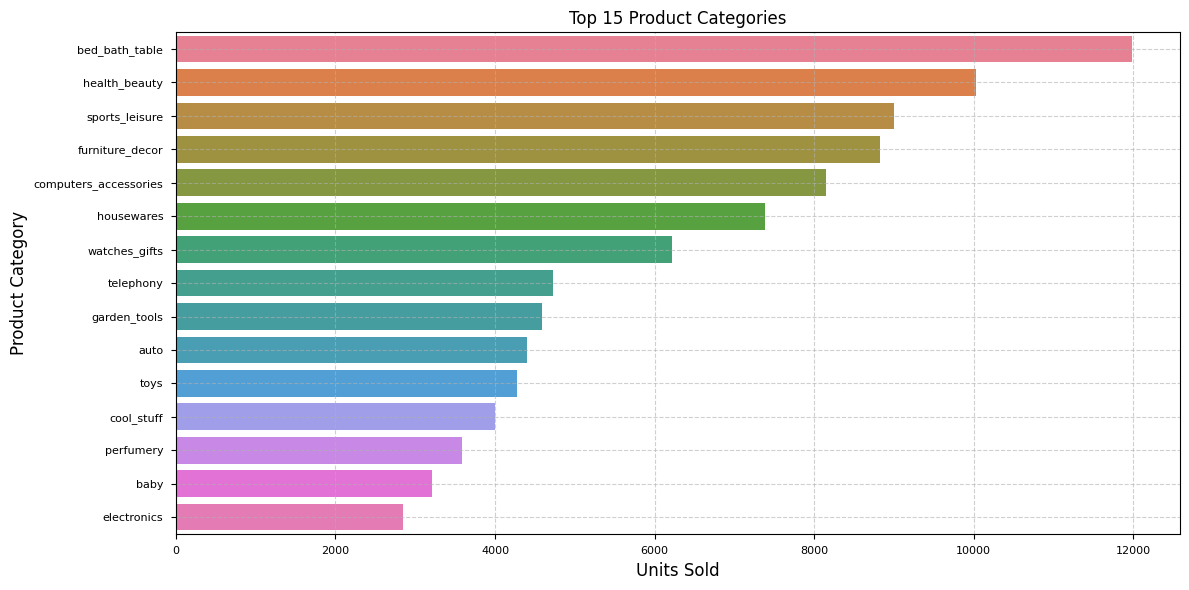

In [39]:
# we will plot only the top 15
prod_categories_plot = prod_categories.sort_values(ascending=False).head(15)
plot_bar(x=prod_categories_plot.values, y=prod_categories_plot.index, title='Top 15 Product Categories', save_path='top_15_product_categories.png', orientation='h', xlabel='Units Sold', ylabel='Product Category')

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/top_15_worst_product_categories.png


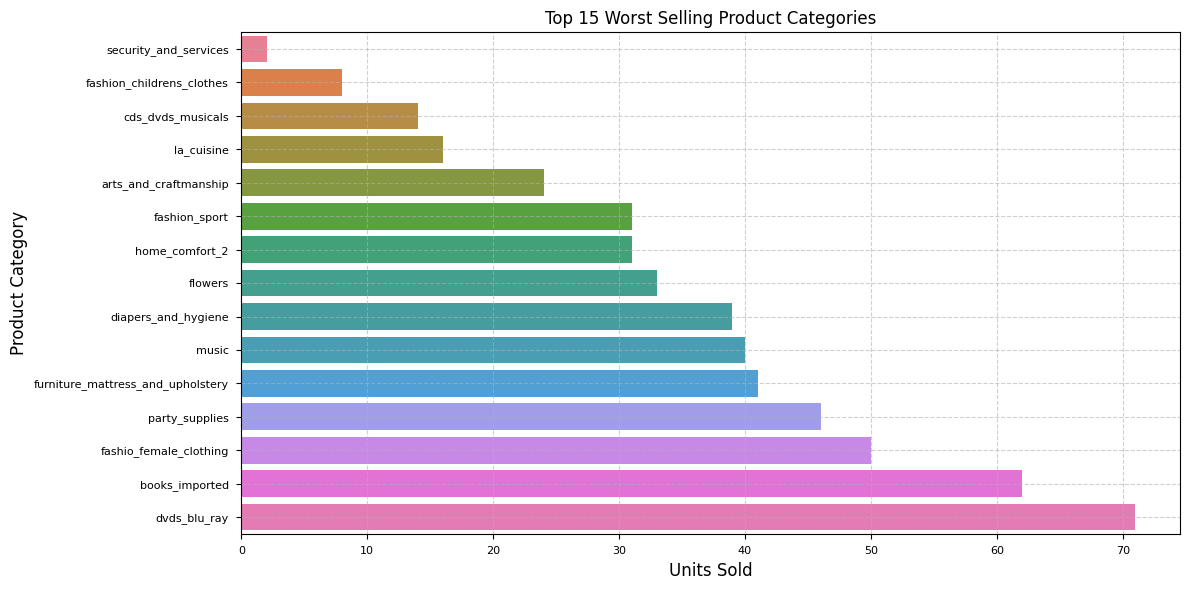

In [40]:
prod_categories_plot2 = prod_categories.sort_values(ascending=True).head(15)
plot_bar(x=prod_categories_plot2.values, y=prod_categories_plot2.index, title='Top 15 Worst Selling Product Categories', save_path='top_15_worst_product_categories.png', orientation='h', xlabel='Units Sold', ylabel='Product Category')

In [41]:
prod_categories_percentage = prod_categories_plot.values/prod_categories_plot.values.sum()
prod_categories_percentage

array([0.1285797 , 0.10760023, 0.09657421, 0.09472939, 0.08741446,
       0.07915567, 0.06663878, 0.05068966, 0.04923097, 0.04719308,
       0.04591673, 0.04289208, 0.03849454, 0.03436515, 0.03052534])

### Insight: The Business Portfolio is Driven by "Home & Lifestyle" Categories

The analysis of product categories reveals that sales volume is not dominated by a single category, but rather led by a strong group of related product lines.

* **Top Performers:** The `bed_bath_table` category is the clear leader in terms of units sold, followed closely by `health_beauty` and `sports_leisure`. These top three categories form the primary drivers of sales volume.
* **Market Structure:** The distribution shows a gradual decline in sales after the top few categories, rather than a steep drop-off. This indicates a diversified product portfolio, which can be a strength, reducing reliance on a single product type.
* **Core Business Focus:** The leading categories—including `furniture_decor`, `housewares`, and `computers_accessories`—point to a core business centered around home goods, personal care, and lifestyle products.

**Business Implication:** Inventory and marketing strategies should be heavily focused on these top-performing categories. The diversified nature of the portfolio also presents an opportunity to identify and grow "up-and-coming" categories that sit just below the top tier.

### 3.2. Which categories generate the most revenue?

While unit sales are important, a true measure of a category's value is the revenue it generates. We will now aggregate the total price of all items sold within each category to identify the most lucrative ones.

In [42]:
prod_data = df_analytics.groupby('product_category_name_english') 
prod_rev = prod_data['price'].sum().sort_values(ascending=False)
prod_rev.head(15) # Top 15 most revenue-generating product categories

product_category_name_english
health_beauty            1301947.97
watches_gifts            1254322.95
bed_bath_table           1107249.09
sports_leisure           1029603.88
computers_accessories     950053.69
furniture_decor           772096.17
housewares                668880.94
cool_stuff                664637.13
auto                      618395.50
garden_tools              519473.33
toys                      501118.39
baby                      434832.19
perfumery                 415055.76
telephony                 339571.03
office_furniture          287422.75
Name: price, dtype: float64

In [43]:
prod_rev_per_unit = prod_data.agg({'price':'sum', 'product_category_name_english':'count'})
prod_rev_per_unit = prod_rev_per_unit.sort_values(by='price', ascending=False)
prod_rev_per_unit = prod_rev_per_unit['price'] / prod_rev_per_unit['product_category_name_english']
prod_rev_per_unit.head(15).sort_values(ascending=False) # top 15 categories by revenue per unit sold

product_category_name_english
watches_gifts            201.886842
cool_stuff               166.200833
office_furniture         160.750979
auto                     140.544432
baby                     135.715415
health_beauty            129.779503
toys                     117.056386
computers_accessories    116.571005
perfumery                115.646631
sports_leisure           114.349609
garden_tools             113.175017
bed_bath_table            92.363121
housewares                90.634274
furniture_decor           87.420309
telephony                 71.851678
dtype: float64

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/top_15_product_categories_revenue.png


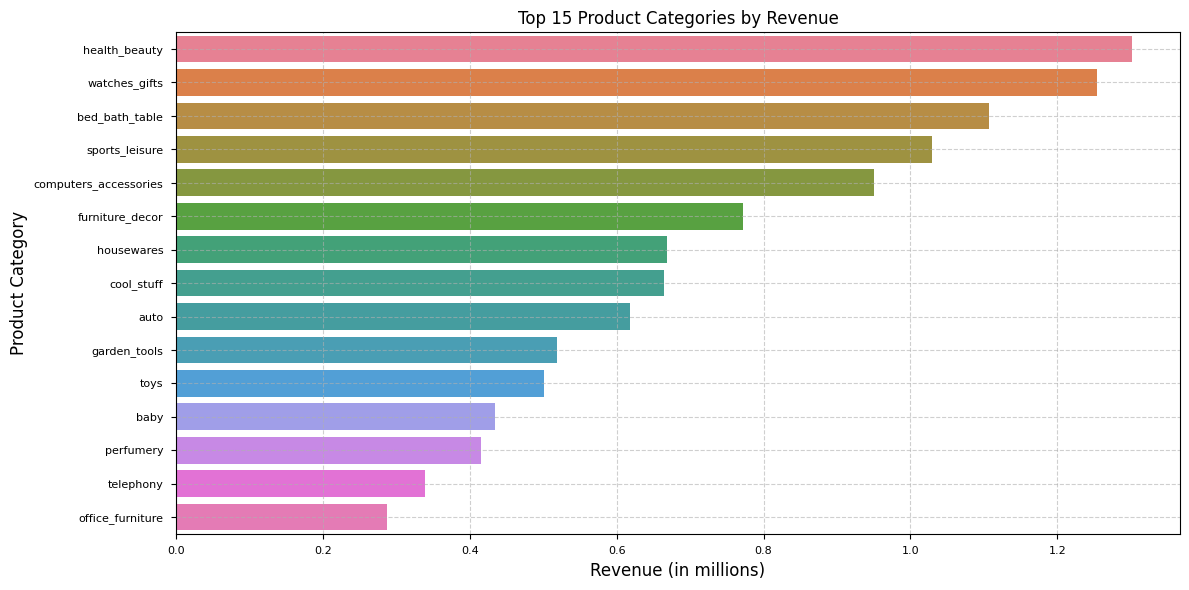

In [44]:
prod_rev_plot = prod_rev.head(15)
plot_bar(x=prod_rev_plot.values/1000000, y=prod_rev_plot.index, title='Top 15 Product Categories by Revenue', save_path='top_15_product_categories_revenue.png', orientation='h', xlabel='Revenue (in millions)', ylabel='Product Category')

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/top_15_product_categories_revenue_per_unit.png


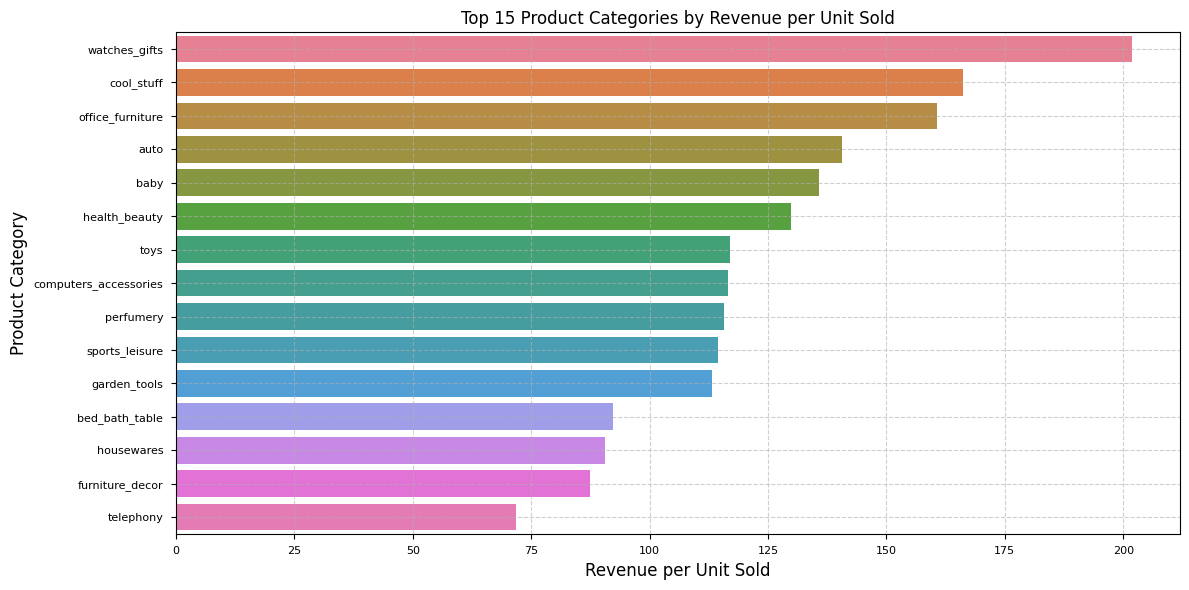

In [45]:
prod_rev_per_unit_plot = prod_rev_per_unit.head(15).sort_values(ascending=False) 
plot_bar(x=prod_rev_per_unit_plot.values, y=prod_rev_per_unit_plot.index, title='Top 15 Product Categories by Revenue per Unit Sold', save_path='top_15_product_categories_revenue_per_unit.png', orientation='h', xlabel='Revenue per Unit Sold', ylabel='Product Category')

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/top_15_worst_selling_product_categories_revenue.png


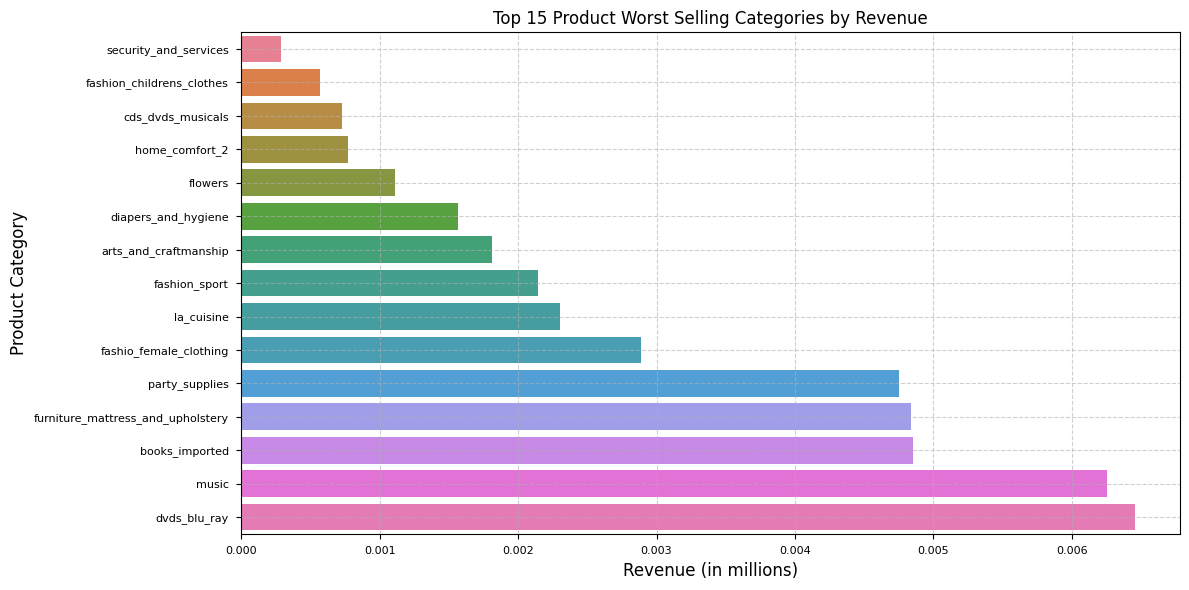

In [46]:
prod_rev2 = prod_data['price'].sum().sort_values(ascending=True)
prod_rev_plot2 = prod_rev2.head(15)
plot_bar(x=prod_rev_plot2.values/1000000, y=prod_rev_plot2.index, title='Top 15 Product Worst Selling Categories by Revenue', save_path='top_15_worst_selling_product_categories_revenue.png', orientation='h', xlabel='Revenue (in millions)', ylabel='Product Category')

### 3.3. Which categories have the best and worst review scores?

A popular category is not necessarily a successful one if it leads to customer dissatisfaction. We will now calculate the average review score for each product category to identify which products are delighting customers and which are causing problems.

In [47]:
prod_review = prod_data.agg(total_revenue=('price', 'sum'), average_score=('review_score', 'mean'))
prod_review.head(15)

,total_revenue,average_score
product_category_name_english,,
agro_industry_and_commerce,83841.95,4.150794
air_conditioning,55962.38,3.969697
art,24721.97,3.935484
arts_and_craftmanship,1814.01,4.125000
audio,52500.27,3.840849
auto,618395.50,4.064279
baby,434832.19,4.011643
bed_bath_table,1107249.09,3.890605
books_general_interest,48197.45,4.438503


In [48]:
customer_satisfaction = prod_review.sort_values(by='average_score', ascending=False).head(15)
customer_satisfaction

,total_revenue,average_score
product_category_name_english,,
cds_dvds_musicals,730.00,4.642857
fashion_childrens_clothes,569.85,4.500000
books_general_interest,48197.45,4.438503
books_imported,4851.85,4.419355
flowers,1110.04,4.419355
costruction_tools_tools,16072.90,4.415842
books_technical,19323.88,4.375465
food_drink,16454.52,4.324138
small_appliances_home_oven_and_coffee,48945.71,4.320513


/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/top_15_product_categories_by_customer_satisfaction.png


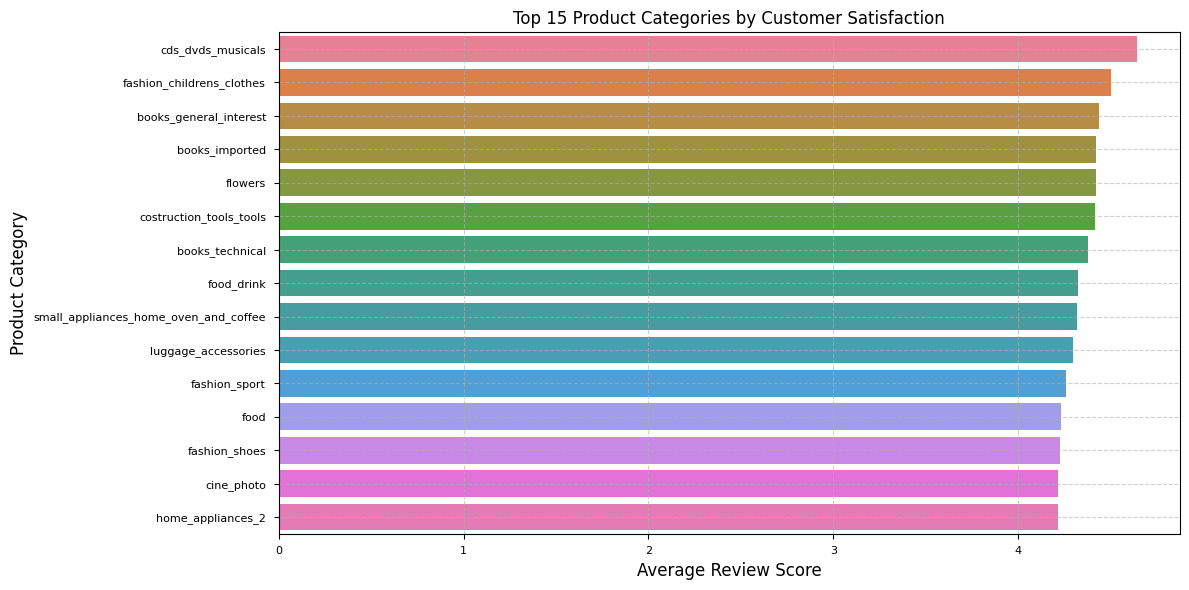

In [49]:
customer_satisfaction_plot = customer_satisfaction['average_score'].head(15)
plot_bar(x=customer_satisfaction_plot.values, y=customer_satisfaction_plot.index, title='Top 15 Product Categories by Customer Satisfaction', save_path='top_15_product_categories_by_customer_satisfaction.png', xlabel='Average Review Score', ylabel='Product Category')

In [50]:
customer_dissatisfaction = prod_review.sort_values(by='average_score', ascending=True).head(15)
customer_dissatisfaction

,total_revenue,average_score
product_category_name_english,,
security_and_services,283.29,2.500000
diapers_and_hygiene,1567.59,3.256410
office_furniture,287422.75,3.526791
fashion_male_clothing,11631.61,3.548611
home_comfort_2,773.17,3.642857
fixed_telephony,61741.25,3.672862
fashio_female_clothing,2889.44,3.780000
furniture_mattress_and_upholstery,4835.88,3.804878
uncategorized,197510.89,3.833721


/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/top_15_product_categories_by_customer_dissatisfaction.png


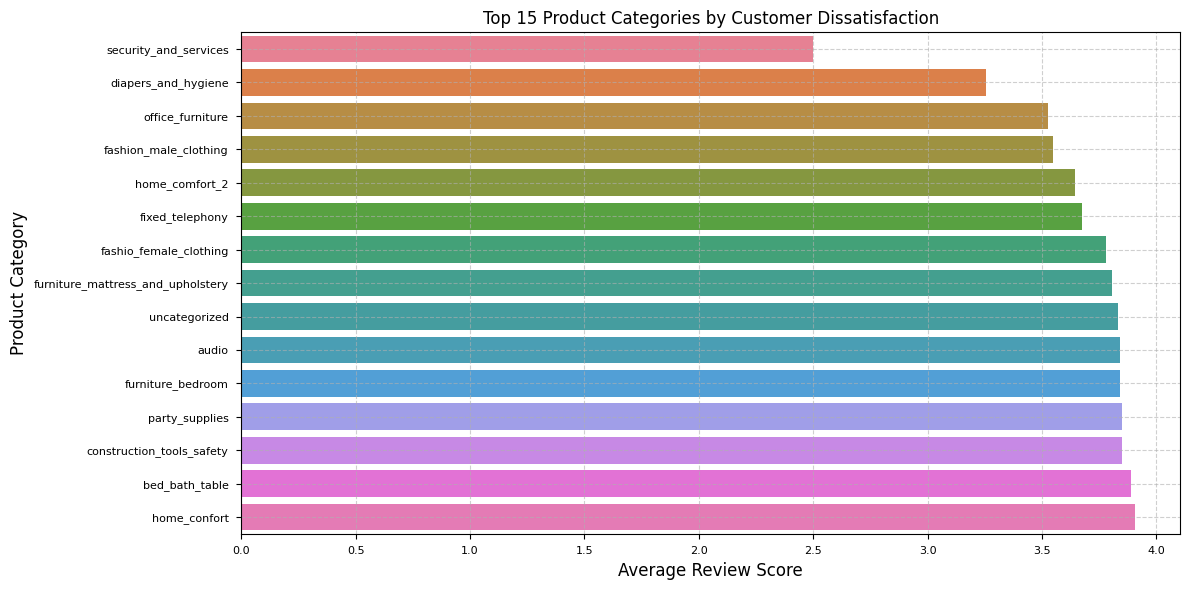

In [51]:
customer_dissatisfaction_plot = customer_dissatisfaction['average_score'].head(15)
plot_bar(x=customer_dissatisfaction_plot.values, y=customer_dissatisfaction_plot.index, title='Top 15 Product Categories by Customer Dissatisfaction', save_path='top_15_product_categories_by_customer_dissatisfaction.png', xlabel='Average Review Score', ylabel='Product Category')


In [52]:
customer_satisfaction_revenue = prod_review.sort_values(by='total_revenue', ascending=False).head(15)
customer_satisfaction_revenue

,total_revenue,average_score
product_category_name_english,,
health_beauty,1301947.97,4.137026
watches_gifts,1254322.95,4.017692
bed_bath_table,1107249.09,3.890605
sports_leisure,1029603.88,4.107470
computers_accessories,950053.69,3.936089
furniture_decor,772096.17,3.912158
housewares,668880.94,4.060428
cool_stuff,664637.13,4.140767
auto,618395.50,4.064279


In [53]:
customer_dissatisfaction_revenue = prod_review.sort_values(by='total_revenue', ascending=True).head(15)
customer_dissatisfaction_revenue


,total_revenue,average_score
product_category_name_english,,
security_and_services,283.29,2.500000
fashion_childrens_clothes,569.85,4.500000
cds_dvds_musicals,730.00,4.642857
home_comfort_2,773.17,3.642857
flowers,1110.04,4.419355
diapers_and_hygiene,1567.59,3.256410
arts_and_craftmanship,1814.01,4.125000
fashion_sport,2144.50,4.258065
la_cuisine,2303.98,4.133333


- We can condense all this information in a single dataset that is much more precise. We will add filters for statistical relevance and plot a bubble plot.



In [54]:
category_performance = df_analytics.groupby('product_category_name_english').agg(
    total_revenue=('price', 'sum'),
    average_score=('review_score', 'mean'),
    units_sold=('product_category_name_english', 'count') 
)

category_performance = category_performance.drop('uncategorized', errors='ignore')
category_performance.head(15)

,total_revenue,average_score,units_sold
product_category_name_english,,,
agro_industry_and_commerce,83841.95,4.150794,252
air_conditioning,55962.38,3.969697,302
art,24721.97,3.935484,219
arts_and_craftmanship,1814.01,4.125000,24
audio,52500.27,3.840849,381
auto,618395.50,4.064279,4400
baby,434832.19,4.011643,3204
bed_bath_table,1107249.09,3.890605,11988
books_general_interest,48197.45,4.438503,565


In [55]:
display(category_performance['units_sold'].describe())

count       71.000000
mean      1641.915493
std       2744.413691
min          2.000000
25%         96.000000
50%        299.000000
75%       1909.000000
max      11988.000000
Name: units_sold, dtype: float64

In [56]:
# We will define our sales threshold as the median (the 50% value) which is equal to 299 as seen in the values above.
sales_threshold = category_performance['units_sold'].quantile(0.50)
relevant_categories = category_performance[category_performance['units_sold'] >= sales_threshold]
relevant_categories.sort_values(by='average_score', ascending=False).head(15)


,total_revenue,average_score,units_sold
product_category_name_english,,,
books_general_interest,48197.45,4.438503,565
luggage_accessories,148420.93,4.295945,1163
food,30119.44,4.228963,526
pet_shop,223208.30,4.197030,2030
stationery,239385.97,4.188339,2625
home_appliances,85314.59,4.174970,826
toys,501118.39,4.162506,4281
musical_instruments,210953.63,4.157303,719
small_appliances,201839.56,4.155937,705


Bubble plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/category_performance_bubble_plot.png


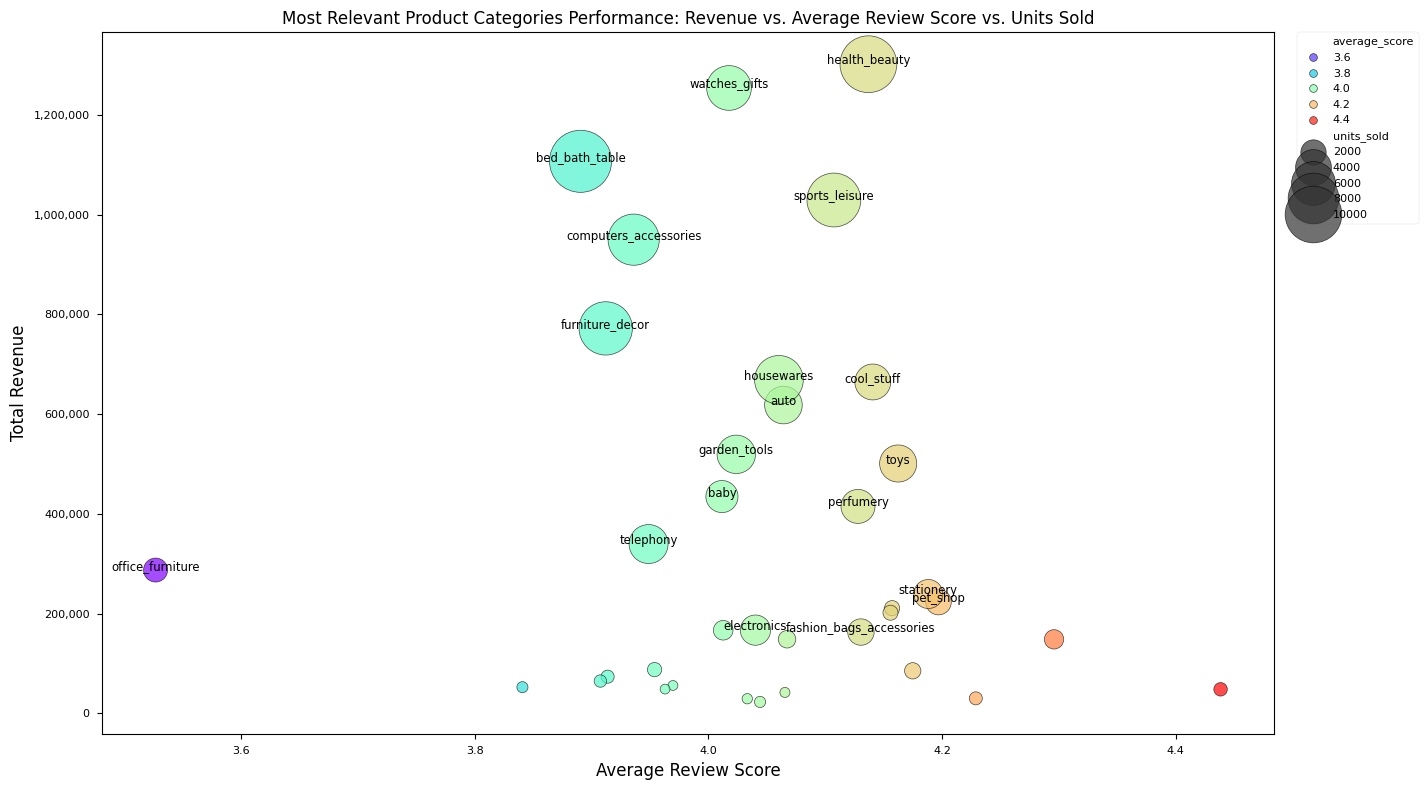

In [57]:
plot_bubble(
    data=relevant_categories,
    x_col='average_score',
    y_col='total_revenue',
    size_col='units_sold',
    title='Most Relevant Product Categories Performance: Revenue vs. Average Review Score vs. Units Sold',
    xlabel='Average Review Score',
    ylabel='Total Revenue',
    top_n_labels=19,
    save_path='category_performance_bubble_plot.png'
)


### Insight: Category Performance Reveals Strategic Opportunities and Key Challenges

The combined analysis of revenue, customer satisfaction, and sales volume for each product category provides a strategic map of the Olist portfolio, highlighting clear winners, underperformers, and growth opportunities.

* **Core Business Stars:** Categories like `health_beauty` and `watches_gifts` emerge as top performers, combining both high total revenue and high average customer satisfaction (scores > 4.2). These are the strategic pillars of the business.

* **High-Volume, Moderate Satisfaction:** The highest volume categories, such as `bed_bath_table`, `computers_accessories`, and `furniture_decor`, are critical revenue generators but suffer from mediocre average review scores (< 4.0). Improving the customer experience in these high-traffic categories represents the single largest opportunity for boosting overall satisfaction and potentially increasing revenue through higher customer loyalty.

* **High-Value Problem Children:** `office_furniture` stands out as a key challenge. Despite having a high revenue per unit sold, its average satisfaction score is one of the lowest among relevant categories (around 3.5). This suggests potential issues with product quality, inaccurate descriptions, or shipping damages that need urgent investigation.

* **Untapped Growth Potential:** Several categories, such as `luggage_accessories` and `home_appliances_2`, show a promising combination of high customer satisfaction and already substantial revenue. These are prime candidates for targeted marketing campaigns to transform them from niche successes into core business drivers.

* **Critical Failures:** The `security_and_services` category, with an extremely low average score of 2.5, represents a significant point of failure in the customer experience, even if its financial impact is small.

---
## 4. Payment Methods Analysis

Finally, we analyze the payment behavior of the customers. Understanding how customers pay can provide insights for financial planning and marketing promotions.

### 4.1. What are the most common payment methods?

Pie chart saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/payment_method_distribution.png


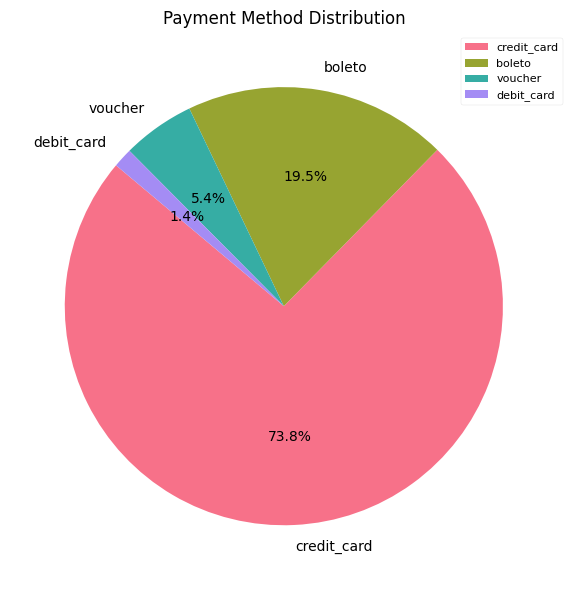

In [58]:
df_clean_pay = df_analytics.dropna(subset=['payment_installments', 'payment_type', 'payment_value'])
payment_data = df_clean_pay.groupby('payment_type')
payment_plot = payment_data.size().sort_values(ascending=False)
pie_plot(payment_plot, title='Payment Method Distribution', save_path='payment_method_distribution.png')

### 4.2. Is there a relationship between the number of installments and the order value?

In [59]:
df_clean_pay = df_clean_pay[['payment_installments', 'payment_type', 'payment_value']]
filt = df_clean_pay['payment_type'] == 'credit_card'
payment_plot2 = df_clean_pay[filt]
payment_plot2

,payment_installments,payment_type,payment_value
0,1.0,credit_card,18.12
4,3.0,credit_card,179.12
5,1.0,credit_card,72.20
6,1.0,credit_card,28.62
7,6.0,credit_card,175.26
...,...,...,...
118304,3.0,credit_card,85.08
118305,3.0,credit_card,195.00
118306,5.0,credit_card,271.01
118307,4.0,credit_card,441.16


/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/payment_value_vs_installments.png


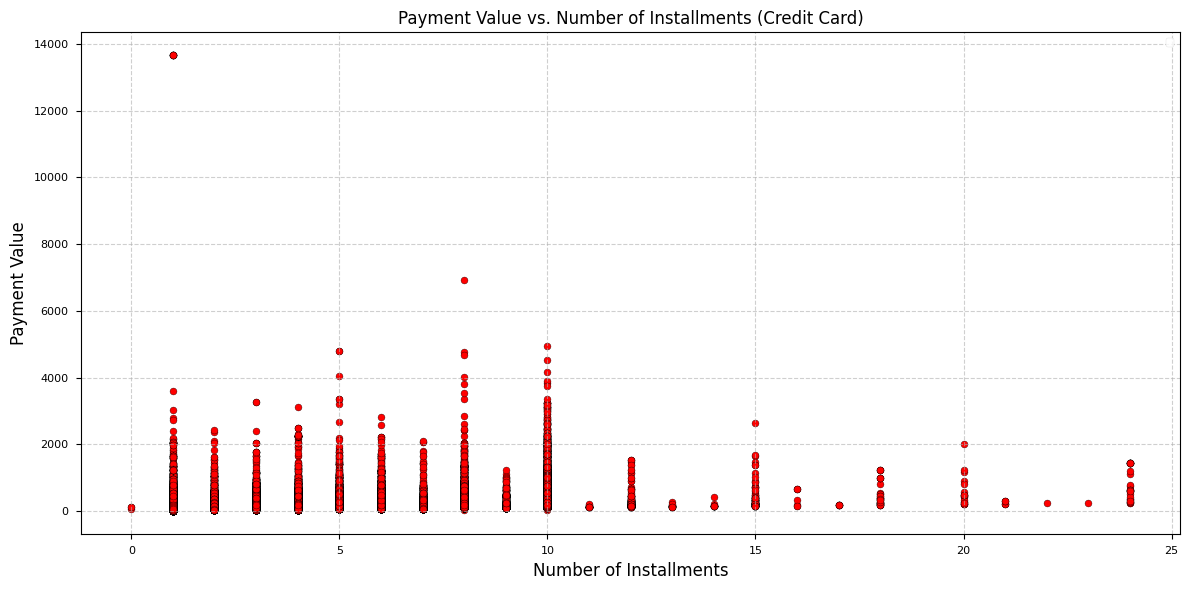

In [60]:
plot_scatter(x=payment_plot2['payment_installments'], y=payment_plot2['payment_value'], title='Payment Value vs. Number of Installments (Credit Card)', xlabel='Number of Installments', ylabel='Payment Value', save_path='payment_value_vs_installments.png')

In [61]:
pay_corr = payment_plot2[['payment_installments', 'payment_value']].corr(method='spearman')
pay_corr

,payment_installments,payment_value
payment_installments,1.000000,0.472786
payment_value,0.472786,1.000000


### Insight: Credit Card Dominance and a Clear Link Between Installments and Purchase Value

The analysis of payment methods confirms the central role of credit cards in the e-commerce landscape and reveals a clear behavioral pattern related to financing larger purchases.

* **Credit Card is the Primary Method:** Credit cards are the dominant payment method, used in nearly three-quarters (73.8%) of all transactions. `Boleto` remains a significant secondary option (19.5%), highlighting its importance for financial inclusion in the Brazilian market.
* **Installments Enable Higher-Value Purchases:** While not a perfect linear relationship, the Spearman correlation of **0.47** between the number of installments and the payment value indicates a **moderate positive correlation**. This statistically supports the business logic that customers leverage installments to make higher-value purchases, effectively increasing their purchasing power.

**Business Implication:** Offering a robust and flexible credit card payment system with multiple installment options is critical for maximizing revenue. The continued relevance of `boleto` suggests that removing this payment option could alienate a significant portion of the customer base.